In [23]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [24]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [25]:
NUM_CLASSES = 6

# 学習データ読み込み

In [26]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [27]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [29]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [30]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_2 (Dropout)          (None, 42)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                860       
_________________________________________________________________
dropout_3 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 66        
Total params: 1,136
Trainable params: 1,136
Non-trainable params: 0
_________________________________________________________________


In [31]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [32]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [33]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
2/2 [==============================] - 0s 145ms/step - loss: 1.8487 - accuracy: 0.2070 - val_loss: 1.7647 - val_accuracy: 0.2500

Epoch 00001: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 2/1000
2/2 [==============================] - 0s 23ms/step - loss: 1.8743 - accuracy: 0.2311 - val_loss: 1.7593 - val_accuracy: 0.2500

Epoch 00002: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 3/1000
2/2 [==============================] - 0s 24ms/step - loss: 1.8451 - accuracy: 0.2192 - val_loss: 1.7534 - val_accuracy: 0.2500

Epoch 00003: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 4/1000
2/2 [==============================] - 0s 24ms/step - loss: 1.8007 - accuracy: 0.2244 - val_loss: 1.7476 - val_accuracy: 0.2500

Epoch 00004: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 5/1000
2/2 [==============================] - 0s 23ms/step - loss: 1.8071 - accuracy: 0.1993 - val_loss: 


Epoch 00037: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 38/1000
2/2 [==============================] - 0s 23ms/step - loss: 1.6605 - accuracy: 0.3339 - val_loss: 1.6202 - val_accuracy: 0.4808

Epoch 00038: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 39/1000
2/2 [==============================] - 0s 23ms/step - loss: 1.6106 - accuracy: 0.4133 - val_loss: 1.6183 - val_accuracy: 0.5000

Epoch 00039: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 40/1000
2/2 [==============================] - 0s 24ms/step - loss: 1.6498 - accuracy: 0.3562 - val_loss: 1.6154 - val_accuracy: 0.5000

Epoch 00040: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 41/1000
2/2 [==============================] - 0s 23ms/step - loss: 1.6550 - accuracy: 0.3322 - val_loss: 1.6120 - val_accuracy: 0.5000

Epoch 00041: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 42/1000
2/2 [========

2/2 [==============================] - 0s 25ms/step - loss: 1.5318 - accuracy: 0.4314 - val_loss: 1.4827 - val_accuracy: 0.6154

Epoch 00074: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 75/1000
2/2 [==============================] - 0s 23ms/step - loss: 1.5765 - accuracy: 0.3339 - val_loss: 1.4779 - val_accuracy: 0.6154

Epoch 00075: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 76/1000
2/2 [==============================] - 0s 23ms/step - loss: 1.5688 - accuracy: 0.3666 - val_loss: 1.4720 - val_accuracy: 0.6154

Epoch 00076: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 77/1000
2/2 [==============================] - 0s 24ms/step - loss: 1.5405 - accuracy: 0.3711 - val_loss: 1.4669 - val_accuracy: 0.6154

Epoch 00077: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 78/1000
2/2 [==============================] - 0s 22ms/step - loss: 1.5327 - accuracy: 0.4012 - val_loss: 1.4633 - v

Epoch 111/1000
2/2 [==============================] - 0s 24ms/step - loss: 1.4451 - accuracy: 0.4202 - val_loss: 1.3031 - val_accuracy: 0.6346

Epoch 00111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 112/1000
2/2 [==============================] - 0s 22ms/step - loss: 1.4701 - accuracy: 0.4443 - val_loss: 1.2963 - val_accuracy: 0.6346

Epoch 00112: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 113/1000
2/2 [==============================] - 0s 22ms/step - loss: 1.3946 - accuracy: 0.5005 - val_loss: 1.2895 - val_accuracy: 0.6346

Epoch 00113: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 114/1000
2/2 [==============================] - 0s 23ms/step - loss: 1.4554 - accuracy: 0.4176 - val_loss: 1.2845 - val_accuracy: 0.6346

Epoch 00114: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 115/1000
2/2 [==============================] - 0s 23ms/step - loss: 1.4507 - accuracy: 0.3986 - v


Epoch 00147: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 148/1000
2/2 [==============================] - 0s 23ms/step - loss: 1.3182 - accuracy: 0.4564 - val_loss: 1.1408 - val_accuracy: 0.6731

Epoch 00148: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 149/1000
2/2 [==============================] - 0s 25ms/step - loss: 1.3098 - accuracy: 0.4469 - val_loss: 1.1367 - val_accuracy: 0.6731

Epoch 00149: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 150/1000
2/2 [==============================] - 0s 23ms/step - loss: 1.3128 - accuracy: 0.4892 - val_loss: 1.1331 - val_accuracy: 0.6731

Epoch 00150: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 151/1000
2/2 [==============================] - 0s 25ms/step - loss: 1.2638 - accuracy: 0.5005 - val_loss: 1.1294 - val_accuracy: 0.6731

Epoch 00151: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 152/1000
2/2 [===

2/2 [==============================] - 0s 22ms/step - loss: 1.1588 - accuracy: 0.5384 - val_loss: 0.9840 - val_accuracy: 0.7115

Epoch 00184: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 185/1000
2/2 [==============================] - 0s 24ms/step - loss: 1.1953 - accuracy: 0.5488 - val_loss: 0.9800 - val_accuracy: 0.7308

Epoch 00185: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 186/1000
2/2 [==============================] - 0s 24ms/step - loss: 1.2032 - accuracy: 0.5246 - val_loss: 0.9763 - val_accuracy: 0.7308

Epoch 00186: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 187/1000
2/2 [==============================] - 0s 22ms/step - loss: 1.2412 - accuracy: 0.5022 - val_loss: 0.9718 - val_accuracy: 0.7308

Epoch 00187: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 188/1000
2/2 [==============================] - 0s 24ms/step - loss: 1.1899 - accuracy: 0.5307 - val_loss: 0.9670

Epoch 221/1000
2/2 [==============================] - 0s 24ms/step - loss: 1.1059 - accuracy: 0.5531 - val_loss: 0.8590 - val_accuracy: 0.8654

Epoch 00221: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 222/1000
2/2 [==============================] - 0s 24ms/step - loss: 1.0556 - accuracy: 0.6212 - val_loss: 0.8516 - val_accuracy: 0.9231

Epoch 00222: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 223/1000
2/2 [==============================] - 0s 23ms/step - loss: 1.0783 - accuracy: 0.6108 - val_loss: 0.8435 - val_accuracy: 0.9423

Epoch 00223: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 224/1000
2/2 [==============================] - 0s 23ms/step - loss: 1.1150 - accuracy: 0.5427 - val_loss: 0.8356 - val_accuracy: 0.9423

Epoch 00224: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 225/1000
2/2 [==============================] - 0s 23ms/step - loss: 1.1052 - accuracy: 0.5694 - v


Epoch 00257: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 258/1000
2/2 [==============================] - 0s 24ms/step - loss: 1.0257 - accuracy: 0.6386 - val_loss: 0.7309 - val_accuracy: 0.9615

Epoch 00258: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 259/1000
2/2 [==============================] - 0s 25ms/step - loss: 1.0113 - accuracy: 0.5746 - val_loss: 0.7289 - val_accuracy: 0.9615

Epoch 00259: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 260/1000
2/2 [==============================] - 0s 24ms/step - loss: 1.0711 - accuracy: 0.5798 - val_loss: 0.7278 - val_accuracy: 0.9615

Epoch 00260: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 261/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.9677 - accuracy: 0.5970 - val_loss: 0.7251 - val_accuracy: 0.9615

Epoch 00261: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 262/1000
2/2 [===

2/2 [==============================] - 0s 23ms/step - loss: 1.0858 - accuracy: 0.5867 - val_loss: 0.6377 - val_accuracy: 0.9808

Epoch 00294: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 295/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.9269 - accuracy: 0.6350 - val_loss: 0.6349 - val_accuracy: 0.9808

Epoch 00295: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 296/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.9400 - accuracy: 0.6360 - val_loss: 0.6335 - val_accuracy: 1.0000

Epoch 00296: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 297/1000
2/2 [==============================] - 0s 22ms/step - loss: 1.0326 - accuracy: 0.6134 - val_loss: 0.6339 - val_accuracy: 1.0000

Epoch 00297: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 298/1000
2/2 [==============================] - 0s 23ms/step - loss: 1.0187 - accuracy: 0.5669 - val_loss: 0.6340

2/2 [==============================] - 0s 24ms/step - loss: 0.9135 - accuracy: 0.6575 - val_loss: 0.5629 - val_accuracy: 0.9615

Epoch 00331: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 332/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.9203 - accuracy: 0.5910 - val_loss: 0.5585 - val_accuracy: 0.9615

Epoch 00332: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 333/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.8733 - accuracy: 0.6748 - val_loss: 0.5536 - val_accuracy: 0.9615

Epoch 00333: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 334/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.9513 - accuracy: 0.6480 - val_loss: 0.5503 - val_accuracy: 0.9615

Epoch 00334: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 335/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.8224 - accuracy: 0.6756 - val_loss: 0.5467

2/2 [==============================] - 0s 25ms/step - loss: 0.8951 - accuracy: 0.6384 - val_loss: 0.5039 - val_accuracy: 0.9615

Epoch 00368: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 369/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.8551 - accuracy: 0.7118 - val_loss: 0.5025 - val_accuracy: 0.9615

Epoch 00369: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 370/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.8552 - accuracy: 0.6955 - val_loss: 0.5016 - val_accuracy: 0.9615

Epoch 00370: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 371/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.8042 - accuracy: 0.7248 - val_loss: 0.5006 - val_accuracy: 0.9615

Epoch 00371: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 372/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.8441 - accuracy: 0.6644 - val_loss: 0.4997

Epoch 405/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.9062 - accuracy: 0.6317 - val_loss: 0.4541 - val_accuracy: 1.0000

Epoch 00405: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 406/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.8258 - accuracy: 0.6644 - val_loss: 0.4502 - val_accuracy: 1.0000

Epoch 00406: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 407/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.9078 - accuracy: 0.6255 - val_loss: 0.4480 - val_accuracy: 1.0000

Epoch 00407: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 408/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.7621 - accuracy: 0.7196 - val_loss: 0.4475 - val_accuracy: 1.0000

Epoch 00408: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 409/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.7601 - accuracy: 0.7092 - v

2/2 [==============================] - 0s 24ms/step - loss: 0.6888 - accuracy: 0.7480 - val_loss: 0.4019 - val_accuracy: 1.0000

Epoch 00441: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 442/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.7620 - accuracy: 0.7455 - val_loss: 0.4000 - val_accuracy: 1.0000

Epoch 00442: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 443/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.7573 - accuracy: 0.7170 - val_loss: 0.3994 - val_accuracy: 1.0000

Epoch 00443: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 444/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.7206 - accuracy: 0.7316 - val_loss: 0.3978 - val_accuracy: 1.0000

Epoch 00444: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 445/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.8378 - accuracy: 0.6894 - val_loss: 0.3968

2/2 [==============================] - 0s 23ms/step - loss: 0.6281 - accuracy: 0.8154 - val_loss: 0.3658 - val_accuracy: 1.0000

Epoch 00478: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 479/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.8061 - accuracy: 0.7204 - val_loss: 0.3652 - val_accuracy: 1.0000

Epoch 00479: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 480/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.7317 - accuracy: 0.7265 - val_loss: 0.3645 - val_accuracy: 1.0000

Epoch 00480: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 481/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.6910 - accuracy: 0.7213 - val_loss: 0.3650 - val_accuracy: 1.0000

Epoch 00481: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 482/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.7082 - accuracy: 0.7446 - val_loss: 0.3649

Epoch 515/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.6947 - accuracy: 0.7670 - val_loss: 0.3511 - val_accuracy: 0.9615

Epoch 00515: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 516/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.6981 - accuracy: 0.7420 - val_loss: 0.3499 - val_accuracy: 0.9615

Epoch 00516: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 517/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.6507 - accuracy: 0.7705 - val_loss: 0.3475 - val_accuracy: 0.9615

Epoch 00517: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 518/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.6582 - accuracy: 0.7541 - val_loss: 0.3441 - val_accuracy: 0.9615

Epoch 00518: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 519/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.7256 - accuracy: 0.7325 - v


Epoch 00551: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 552/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.7008 - accuracy: 0.7360 - val_loss: 0.3063 - val_accuracy: 1.0000

Epoch 00552: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 553/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.6616 - accuracy: 0.7696 - val_loss: 0.3051 - val_accuracy: 1.0000

Epoch 00553: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 554/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.6943 - accuracy: 0.7368 - val_loss: 0.3038 - val_accuracy: 1.0000

Epoch 00554: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 555/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.6206 - accuracy: 0.7567 - val_loss: 0.3034 - val_accuracy: 1.0000

Epoch 00555: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 556/1000
2/2 [===

2/2 [==============================] - 0s 23ms/step - loss: 0.6038 - accuracy: 0.7947 - val_loss: 0.2908 - val_accuracy: 1.0000

Epoch 00588: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 589/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.7535 - accuracy: 0.6472 - val_loss: 0.2895 - val_accuracy: 1.0000

Epoch 00589: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 590/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.7129 - accuracy: 0.7765 - val_loss: 0.2881 - val_accuracy: 1.0000

Epoch 00590: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 591/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.6249 - accuracy: 0.7894 - val_loss: 0.2868 - val_accuracy: 1.0000

Epoch 00591: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 592/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.7285 - accuracy: 0.7420 - val_loss: 0.2862


Epoch 00624: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 625/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.6262 - accuracy: 0.7584 - val_loss: 0.2741 - val_accuracy: 1.0000

Epoch 00625: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 626/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.6617 - accuracy: 0.7904 - val_loss: 0.2762 - val_accuracy: 1.0000

Epoch 00626: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 627/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.5818 - accuracy: 0.7420 - val_loss: 0.2776 - val_accuracy: 1.0000

Epoch 00627: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 628/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.5890 - accuracy: 0.7515 - val_loss: 0.2793 - val_accuracy: 0.9808

Epoch 00628: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 629/1000
2/2 [===

In [45]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

1/1 [==============================] - 0s 74ms/step - loss: 0.2747 - accuracy: 1.0000


In [46]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [47]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[0.00748507 0.00149361 0.01241582 0.9188307  0.0017323  0.05804257]
3


# 混同行列

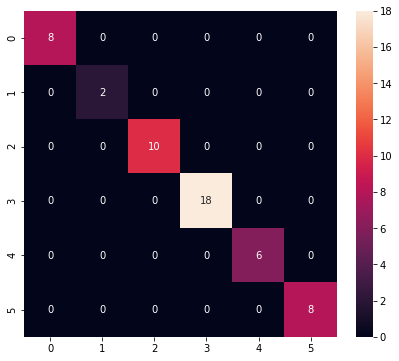

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        18
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         8

    accuracy                           1.00        52
   macro avg       1.00      1.00      1.00        52
weighted avg       1.00      1.00      1.00        52



In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [49]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [50]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\s3a1\AppData\Local\Temp\tmpga1u38iq\assets


INFO:tensorflow:Assets written to: C:\Users\s3a1\AppData\Local\Temp\tmpga1u38iq\assets


6496

# 推論テスト

In [51]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [52]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [53]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [54]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 0 ns


In [55]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.00748507 0.00149361 0.01241582 0.9188307  0.0017323  0.05804257]
3
